# Analazying where do people drink
### Description
This Dataset is from the story <a href=https://fivethirtyeight.com/features/dear-mona-followup-where-do-people-drink-the-most-beer-wine-and-spirits/>  Dear Mona Followup: Where Do People Drink The Most Beer, Wine And Spirits? </a>  The dataset contains Average serving sizes per person such as average wine, spirit, beer servings. As well as several other metrics. You will be asked to analyze the data and predict the total liters served given the servings. See how to share your lab at the end.

You will need the following libraries:

### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures

#### Import Data

In [2]:
# Load the CSV
df= pd.read_csv('https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/edx/project/drinks.csv')
df.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,Asia
1,Albania,89,132,54,4.9,Europe
2,Algeria,25,0,14,0.7,Africa
3,Andorra,245,138,312,12.4,Europe
4,Angola,217,57,45,5.9,Africa


<b> Question 1:</b> Display the data types of each column using the attribute dtype.

In [3]:
df.dtypes

country                          object
beer_servings                     int64
spirit_servings                   int64
wine_servings                     int64
total_litres_of_pure_alcohol    float64
continent                        object
dtype: object

<b> Question 2:</b> Use the method groupby to get the number of wine servings per continent:

In [4]:
df['continent'].unique()

array(['Asia', 'Europe', 'Africa', 'North America', 'South America',
       'Oceania'], dtype=object)

In [5]:
df['wine_servings'].describe()

count    193.000000
mean      49.450777
std       79.697598
min        0.000000
25%        1.000000
50%        8.000000
75%       59.000000
max      370.000000
Name: wine_servings, dtype: float64

In [6]:
df_group = df[['wine_servings','continent']]
df_grouping = df_group.groupby(['continent'],as_index=False).mean()
df_grouping

,continent,wine_servings
0,Africa,16.264151
1,Asia,9.068182
2,Europe,142.222222
3,North America,24.521739
4,Oceania,35.625000
5,South America,62.416667


<b>Question 3:</b> Perform a statistical summary and analysis of beer servings for each continent:

In [7]:
df['beer_servings'].describe()

count    193.000000
mean     106.160622
std      101.143103
min        0.000000
25%       20.000000
50%       76.000000
75%      188.000000
max      376.000000
Name: beer_servings, dtype: float64

In [8]:
df_group = df[['beer_servings','continent']]
df_grouping = df_group.groupby(['continent'],as_index=False).mean()
df_grouping

,continent,beer_servings
0,Africa,61.471698
1,Asia,37.045455
2,Europe,193.777778
3,North America,145.434783
4,Oceania,89.687500
5,South America,175.083333


<b> Question 4:</b> Question 4: Use the function boxplot in the seaborn library to produce a plot that can be used to show the number of beer servings on each continent.

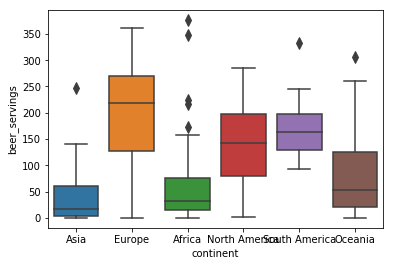

In [16]:
# Relationship between "drive-wheels" and "price"
sns.boxplot(x="continent", y="beer_servings", data=df);

<b> Question 5:</b> Use the function  regplot in the seaborn library to determine if the number of wine servings is negatively or positively correlated with the number of beer servings.

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


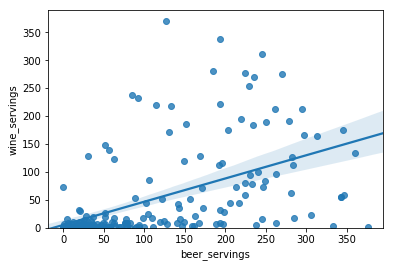

In [10]:
# Scatterplot "Wine Servings" & "Beer Servings"
sns.regplot(x="beer_servings", y="wine_servings", data=df);
plt.ylim(0,);

<b> Question 6:</b> Fit a linear regression model to predict the <code>'total_litres_of_pure_alcohol'</code> using the number of <code>'wine_servings'</code> then calculate $R^{2}$:

In [11]:
# Create the Linear Regression Objdect
lm = LinearRegression()

# Predict total liters with wine servings
X = df[['wine_servings']]
Y = df['total_litres_of_pure_alcohol']

# Output a prediction
lm.fit(X,Y)
Yhat = lm.predict(X) 
Yhat = Yhat[0:5]
print("The predicted values are:", Yhat)

# Calculate R^2
lm.fit(X,Y)
print("The R-square is:", lm.score(X,Y))

The predicted values are: [ 3.15407943  4.86088833  3.59658545 13.01564196  4.57642018]
The R-square is: 0.4456875459787605


<b> Question 7:</b> Use the list of features to predict the <code>'total_litres_of_pure_alcohol'</code>, split the data into training and testing and determine the $R^2$ on the test data, using the provided code:

In [12]:
# Predict total liters with wine servings
X = df[['beer_servings', 'wine_servings', 'spirit_servings']]
y = df['total_litres_of_pure_alcohol']

# Split, Train & Test
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.1, random_state=0)

# Shape
print("X_train shape: {}".format(X_train.shape))
print("y_train shape: {}".format(y_train.shape))

# Calculate R^2
lm.fit(X,y)
print("The R-square is:", lm.score(X,y))

# I got the fit and the score wrong
# Fit is for Train 
# Score is for Test

X_train shape: (173, 3)
y_train shape: (173,)
The R-square is: 0.8741728224192638


<b>Question 8 :</b> Create a pipeline object that scales the data, performs a polynomial transform and fits a linear regression model. Fit the object using the training data in the question above, then calculate the R^2 using. the test data. Take a screenshot of your code and the $R^{2}$. There are some hints in the notebook:

In [13]:
# Create the pipeline
Input = [('scale',StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False)), ('model',LinearRegression())]
pipe = Pipeline(Input)
pipe.fit(X,y)
ypipe = pipe.predict(X)
ypipe[0:10]

# Calculate R^2
lm.fit(X,y)
print("The R-square is:", pipe.score(X,y))

The R-square is: 0.8875350935764912


/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/base.py:467: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/pipeline.py:511: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


<b>Question 9</b>: Create and fit a Ridge regression object using the training data, setting the regularization parameter to 0.1 and calculate the $R^{2}$ using the test data. Take a screenshot of your code and the $R^{2}$

In [14]:
RidgeModel = Ridge(alpha=0.1)
RidgeModel.fit(X,y)
Yhat = RidgeModel.predict(X)

# Calculate R^2
print("The R-square is:", RidgeModel.score(X,y))

The R-square is: 0.8741728224192626


In [15]:
pr=PolynomialFeatures(degree=2)
pr

X_pr=pr.fit_transform(X)

RidgeModel = Ridge(alpha=0.1)
RidgeModel.fit(X_pr,y)
Yhat = RidgeModel.predict(X_pr)

# Calculate R^2
print("The R-square is:", RidgeModel.score(X_pr,y))

The R-square is: 0.8875350935764624
